# 주거 지역 상업 지역 비교

# 데이터 로드

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf #한글 폰트 설치

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import drive
plt.rc('font', family='NanumBarunGothic')
pd.options.display.float_format = '{:.5f}'.format #지수 없앰

구글드라이브 연결

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
liv_popul = pd.read_csv('/content/drive/MyDrive/서울시 우리마을가게 상권분석서비스(상권-생활인구).csv', encoding='euc-kr')
work_popul = pd.read_csv('/content/drive/MyDrive/서울시 우리마을가게 상권분석서비스(상권-직장인구).csv', encoding='euc-kr')
sales = pd.read_csv('/content/drive/MyDrive/서울시우리마을가게상권분석서비스(상권-추정매출)_2020.csv', encoding='euc-kr')

# 데이터 체크

In [ ]:
liv_popul.head(5)

,기준 년코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_생활인구_수,남성_생활인구_수,여성_생활인구_수,연령대_10_생활인구_수,연령대_20_생활인구_수,연령대_30_생활인구_수,연령대_40_생활인구_수,연령대_50_생활인구_수,연령대_60_이상_생활인구_수,시간대_1_생활인구_수,시간대_2_생활인구_수,시간대_3_생활인구_수,시간대_4_생활인구_수,시간대_5_생활인구_수,시간대_6_생활인구_수,월요일_생활인구_수,화요일_생활인구_수,수요일_생활인구_수,목요일_생활인구_수,금요일_생활인구_수,토요일_생활인구_수,일요일_생활인구_수,남성연령대_10_월요일시간대_1_생활인구_수,남성연령대_10_월요일시간대_2_생활인구_수,남성연령대_10_월요일시간대_3_생활인구_수,남성연령대_10_월요일시간대_4_생활인구_수,남성연령대_10_월요일시간대_5_생활인구_수,남성연령대_10_월요일시간대_6_생활인구_수,남성연령대_10_화요일시간대_1_생활인구_수,남성연령대_10_화요일시간대_2_생활인구_수,남성연령대_10_화요일시간대_3_생활인구_수,남성연령대_10_화요일시간대_4_생활인구_수,남성연령대_10_화요일시간대_5_생활인구_수,남성연령대_10_화요일시간대_6_생활인구_수,...,여성연령대_60_이상_월요일시간대_3_생활인구_수,여성연령대_60_이상_월요일시간대_4_생활인구_수,여성연령대_60_이상_월요일시간대_5_생활인구_수,여성연령대_60_이상_월요일시간대_6_생활인구_수,여성연령대_60_이상_화요일시간대_1_생활인구_수,여성연령대_60_이상_화요일시간대_2_생활인구_수,여성연령대_60_이상_화요일시간대_3_생활인구_수,여성연령대_60_이상_화요일시간대_4_생활인구_수,여성연령대_60_이상_화요일시간대_5_생활인구_수,여성연령대_60_이상_화요일시간대_6_생활인구_수,여성연령대_60_이상_수요일시간대_1_생활인구_수,여성연령대_60_이상_수요일시간대_2_생활인구_수,여성연령대_60_이상_수요일시간대_3_생활인구_수,여성연령대_60_이상_수요일시간대_4_생활인구_수,여성연령대_60_이상_수요일시간대_5_생활인구_수,여성연령대_60_이상_수요일시간대_6_생활인구_수,여성연령대_60_이상_목요일시간대_1_생활인구_수,여성연령대_60_이상_목요일시간대_2_생활인구_수,여성연령대_60_이상_목요일시간대_3_생활인구_수,여성연령대_60_이상_목요일시간대_4_생활인구_수,여성연령대_60_이상_목요일시간대_5_생활인구_수,여성연령대_60_이상_목요일시간대_6_생활인구_수,여성연령대_60_이상_금요일시간대_1_생활인구_수,여성연령대_60_이상_금요일시간대_2_생활인구_수,여성연령대_60_이상_금요일시간대_3_생활인구_수,여성연령대_60_이상_금요일시간대_4_생활인구_수,여성연령대_60_이상_금요일시간대_5_생활인구_수,여성연령대_60_이상_금요일시간대_6_생활인구_수,여성연령대_60_이상_토요일시간대_1_생활인구_수,여성연령대_60_이상_토요일시간대_2_생활인구_수,여성연령대_60_이상_토요일시간대_3_생활인구_수,여성연령대_60_이상_토요일시간대_4_생활인구_수,여성연령대_60_이상_토요일시간대_5_생활인구_수,여성연령대_60_이상_토요일시간대_6_생활인구_수,여성연령대_60_이상_일요일시간대_1_생활인구_수,여성연령대_60_이상_일요일시간대_2_생활인구_수,여성연령대_60_이상_일요일시간대_3_생활인구_수,여성연령대_60_이상_일요일시간대_4_생활인구_수,여성연령대_60_이상_일요일시간대_5_생활인구_수,여성연령대_60_이상_일요일시간대_6_생활인구_수
0,2021,2,U,관광특구,1001496,강남 마이스 관광특구,95914,47931,47982,5297,20682,27920,21070,11565,9379,6249,18973,22195,22769,20305,5423,14551,15070,14804,15586,15381,11155,9367,33,47,44,46,54,24,34,47,43,50,54,25,...,164,145,114,43,74,163,170,152,119,44,73,172,185,167,129,45,72,169,183,158,123,45,74,164,176,163,134,44,66,118,156,152,134,42,66,101,126,128,110,39
1,2021,2,U,관광특구,1001495,잠실 관광특구,2998695,1453421,1545274,267180,680201,724138,487004,381746,458425,542485,566015,446579,471664,641020,330931,420601,428274,436621,431547,440036,436458,405158,2855,2859,2122,2621,4630,2206,2876,2867,2158,2578,4250,2128,...,5862,5621,6619,3958,6895,7634,6027,5815,6760,4013,6848,7646,6010,5833,6812,3974,6847,7620,5997,5735,6747,4019,6892,7681,5902,5780,6782,3918,6683,6699,5442,5699,6987,3759,6501,6263,5098,5429,6653,3730
2,2021,2,U,관광특구,1001494,종로?청계 관광특구,3889871,2120612,1769259,112828,647107,738727,739216,728774,923217,436093,778855,814205,818207,752413,290099,617545,632500,613934,631677,628893,441076,324246,649,1227,1152,1289,1574,664,515,1323,1245,1376,1594,672,...,14947,13988,10665,5114,8767,13997,14977,13876,10733,5025,8642,13835,14958,13895,10676,4947,8697,13978,14995,14028,10751,5023,8824,13880,14435,13828,10845,4977,8045,10826,11628,10771,8334,3585,4886,6750,7633,7448,6960,4103
3,2021,2,U,관광특구,1001493,동대문패션타운 관광특구,3164130,1516902,1647229,121539,565738,819135,643135,478598,535983,727262,640224,459900,437255,498051,401439,487426,503477,491319,496673,495829,376685,312721,1293,2627,2104,1748,1262,766,1288,2668,2063,1880,1207,746,...,7986,6963,7015,6343,10241,11105,8341,7070,6786,5794,9655,10596,8118,7114,6839,5707,9445,10844,8175,7121,6937,5716,9505,10510,7941,6983,6801,5636,9241,8278,6412,5778,4770,2807,5093,5438,4856,4670,5446,4786
4,2021,2,U,관광특구,1001492,명동 남대문 북창동 다동 무교동 관광특구,3714818,1902360,1812458,96774,653550,966454,851619,595375,551046,209363,820535,926681,905380,680611,172248,613098,631270,588248,632851,619608,354396,275345,305,931,778,846,968,396,271,944,911,814,1028,441,...,14316,11801,5382,1565,2922,10476,14918,12351,5588,1629,2734,9919,14583,12189,5538,1632,2688,10446,14702,12169,5518,1635,2955,10243,14077,11943,5924,1719,2520,6913,11435,10099,4996,1291,1892,3957,5489,5123,3500,1260


In [ ]:
liv_popul.tail(5)

,기준 년코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_생활인구_수,남성_생활인구_수,여성_생활인구_수,연령대_10_생활인구_수,연령대_20_생활인구_수,연령대_30_생활인구_수,연령대_40_생활인구_수,연령대_50_생활인구_수,연령대_60_이상_생활인구_수,시간대_1_생활인구_수,시간대_2_생활인구_수,시간대_3_생활인구_수,시간대_4_생활인구_수,시간대_5_생활인구_수,시간대_6_생활인구_수,월요일_생활인구_수,화요일_생활인구_수,수요일_생활인구_수,목요일_생활인구_수,금요일_생활인구_수,토요일_생활인구_수,일요일_생활인구_수,남성연령대_10_월요일시간대_1_생활인구_수,남성연령대_10_월요일시간대_2_생활인구_수,남성연령대_10_월요일시간대_3_생활인구_수,남성연령대_10_월요일시간대_4_생활인구_수,남성연령대_10_월요일시간대_5_생활인구_수,남성연령대_10_월요일시간대_6_생활인구_수,남성연령대_10_화요일시간대_1_생활인구_수,남성연령대_10_화요일시간대_2_생활인구_수,남성연령대_10_화요일시간대_3_생활인구_수,남성연령대_10_화요일시간대_4_생활인구_수,남성연령대_10_화요일시간대_5_생활인구_수,남성연령대_10_화요일시간대_6_생활인구_수,...,여성연령대_60_이상_월요일시간대_3_생활인구_수,여성연령대_60_이상_월요일시간대_4_생활인구_수,여성연령대_60_이상_월요일시간대_5_생활인구_수,여성연령대_60_이상_월요일시간대_6_생활인구_수,여성연령대_60_이상_화요일시간대_1_생활인구_수,여성연령대_60_이상_화요일시간대_2_생활인구_수,여성연령대_60_이상_화요일시간대_3_생활인구_수,여성연령대_60_이상_화요일시간대_4_생활인구_수,여성연령대_60_이상_화요일시간대_5_생활인구_수,여성연령대_60_이상_화요일시간대_6_생활인구_수,여성연령대_60_이상_수요일시간대_1_생활인구_수,여성연령대_60_이상_수요일시간대_2_생활인구_수,여성연령대_60_이상_수요일시간대_3_생활인구_수,여성연령대_60_이상_수요일시간대_4_생활인구_수,여성연령대_60_이상_수요일시간대_5_생활인구_수,여성연령대_60_이상_수요일시간대_6_생활인구_수,여성연령대_60_이상_목요일시간대_1_생활인구_수,여성연령대_60_이상_목요일시간대_2_생활인구_수,여성연령대_60_이상_목요일시간대_3_생활인구_수,여성연령대_60_이상_목요일시간대_4_생활인구_수,여성연령대_60_이상_목요일시간대_5_생활인구_수,여성연령대_60_이상_목요일시간대_6_생활인구_수,여성연령대_60_이상_금요일시간대_1_생활인구_수,여성연령대_60_이상_금요일시간대_2_생활인구_수,여성연령대_60_이상_금요일시간대_3_생활인구_수,여성연령대_60_이상_금요일시간대_4_생활인구_수,여성연령대_60_이상_금요일시간대_5_생활인구_수,여성연령대_60_이상_금요일시간대_6_생활인구_수,여성연령대_60_이상_토요일시간대_1_생활인구_수,여성연령대_60_이상_토요일시간대_2_생활인구_수,여성연령대_60_이상_토요일시간대_3_생활인구_수,여성연령대_60_이상_토요일시간대_4_생활인구_수,여성연령대_60_이상_토요일시간대_5_생활인구_수,여성연령대_60_이상_토요일시간대_6_생활인구_수,여성연령대_60_이상_일요일시간대_1_생활인구_수,여성연령대_60_이상_일요일시간대_2_생활인구_수,여성연령대_60_이상_일요일시간대_3_생활인구_수,여성연령대_60_이상_일요일시간대_4_생활인구_수,여성연령대_60_이상_일요일시간대_5_생활인구_수,여성연령대_60_이상_일요일시간대_6_생활인구_수
44763,2014,1,A,골목상권,1000005,백석동길,81885,41317,40567,5421,19591,14637,18395,15531,8306,580,12726,19473,20453,21293,7363,11803,11947,14137,13816,14029,9847,6304,0,27,59,107,98,35,0,22,65,98,92,28,...,144,151,154,9,0,106,151,140,137,9,0,133,171,183,151,22,0,132,176,178,153,26,0,127,171,173,182,13,0,83,148,111,86,9,0,31,79,71,53,7
44764,2014,1,A,골목상권,1000004,명륜길,95160,51702,43460,6185,37165,18976,16599,13532,2701,1528,11349,22525,22911,26826,10025,14258,14988,15920,15995,15669,11181,7147,0,41,138,148,164,55,0,35,119,167,182,66,...,58,35,16,0,0,42,55,37,15,0,0,47,62,52,27,0,0,63,81,70,31,0,0,59,69,55,43,0,0,12,30,7,0,0,0,0,0,0,0,0
44765,2014,1,A,골목상권,1000003,돈화문로11가길,97007,60604,36403,666,12116,23662,25507,21874,13184,707,11679,24724,27131,26625,6140,15603,15895,17459,17177,18082,8882,3909,0,2,5,7,6,0,0,1,6,7,8,2,...,213,222,136,8,0,81,212,228,141,7,0,90,232,252,169,12,0,85,232,244,156,11,0,92,230,250,171,15,0,32,133,141,92,6,0,6,37,54,26,2
44766,2014,1,A,골목상권,1000002,난계로27길,189584,115933,73649,2531,23886,45672,46017,45621,25856,2632,28004,47915,51667,47044,12321,29332,28796,32647,32099,34697,19849,12163,0,17,42,54,54,22,0,16,36,51,52,19,...,396,414,272,35,0,165,343,379,248,30,0,212,428,440,313,44,0,208,418,441,308,42,0,211,451,493,337,49,0,110,267,299,203,26,0,49,167,229,133,10
44767,2014,1,A,골목상권,1000001,계동길,147154,85726,61430,3250,23914,44733,41050,27208,7003,35,18780,38594,44212,39819,5718,22840,23238,25726,25684,27164,14227,8275,0,33,54,59,65,11,0,26,53,68,80,9,...,133,118,48,0,0,44,121,125,56,0,0,61,146,149,76,0,0,49,152,160,74,0,0,50,160,158,79,0,0,13,73,75,19,0,0,2,20,26,11,0


In [ ]:
work_popul.head(5)

,기준_년월_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,연령대_60_이상_직장_인구_수,남성연령대_10_직장_인구_수,남성연령대_20_직장_인구_수,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
0,2021,2,U,관광특구,1001496,강남 마이스 관광특구,15904,8904,7000,59,3513,6185,4248,1596,303,25,1160,3361,2887,1246,225,34,2353,2824,1361,350,78
1,2021,2,U,관광특구,1001495,잠실 관광특구,24375,14199,10176,120,4722,6565,5617,4514,2837,51,2484,4186,3496,2297,1685,69,2238,2379,2121,2217,1152
2,2021,2,U,관광특구,1001494,종로?청계 관광특구,32935,17150,15785,68,5357,9965,9483,6401,1661,15,2285,4911,4591,4158,1190,53,3072,5054,4892,2243,471
3,2021,2,U,관광특구,1001493,동대문패션타운 관광특구,6054,2958,3096,36,1434,1695,1160,1061,668,13,543,737,662,600,403,23,891,958,498,461,265
4,2021,2,U,관광특구,1001492,명동 남대문 북창동 다동 무교동 관광특구,104830,53674,51156,423,27134,34007,23384,15726,4156,137,8860,16080,15133,10824,2640,286,18274,17927,8251,4902,1516


In [ ]:
work_popul.tail(5)

,기준_년월_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_직장_인구_수,남성_직장_인구_수,여성_직장_인구_수,연령대_10_직장_인구_수,연령대_20_직장_인구_수,연령대_30_직장_인구_수,연령대_40_직장_인구_수,연령대_50_직장_인구_수,연령대_60_이상_직장_인구_수,남성연령대_10_직장_인구_수,남성연령대_20_직장_인구_수,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
40277,2014,2,A,골목상권,1000006,북촌로11길,17,7,10,0,3,5,2,3,4,0,0,2,0,1,4,0,3,3,2,2,0
40278,2014,2,A,골목상권,1000005,백석동길,91,51,40,0,8,25,24,18,16,0,2,13,14,12,10,0,6,12,10,6,6
40279,2014,2,A,골목상권,1000004,명륜길,7,5,2,0,0,3,2,1,1,0,0,2,2,0,1,0,0,1,0,1,0
40280,2014,2,A,골목상권,1000003,돈화문로11가길,1028,564,464,1,121,298,244,203,161,0,42,144,149,120,109,1,79,154,95,83,52
40281,2014,2,A,골목상권,1000001,계동길,777,378,399,4,156,248,190,133,46,3,45,102,112,82,34,1,111,146,78,51,12


In [ ]:
sales.head(5)

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2020,3,R,전통시장,1001370,역촌중앙시장,CS300009,청과상,33850673.00000,300,25,75,0,0,25,0,0,75,0,0,25,50,25,0,0,50,50,0,0,0,0,25,75,1497817.00000,32352856.00000,0,0.00000,1497817,0,0,32352856,0,0,1497817,1397963.00000,30954893.00000,0.00000,0,1397963.00000,32452710.00000,0,0,0,0.00000,30954893,2895780,100,200,0,0,100,0,0,200,0,0,100,100,100,0,0,100,200,0,0,0,0,100,200,2
1,2020,3,R,전통시장,1001386,신수시장,CS200001,일반교습학원,35211411.00000,110,84,16,0,0,67,0,16,0,16,0,0,16,84,0,0,0,100,0,0,84,16,0,0,24574631.00000,10636780.00000,0,0.00000,24207845,0,366786,0,10636780,0,0,2567499.00000,32643912.00000,0.00000,0,0.00000,35211411.00000,0,0,28792664,6418747.00000,0,0,92,18,0,0,74,0,18,0,18,0,0,18,92,0,0,0,110,0,0,92,18,0,0,1
2,2020,1,A,골목상권,1000022,창신2길,CS200001,일반교습학원,22367209.00000,82,100,0,0,71,29,0,0,0,0,0,0,0,0,100,0,71,29,0,0,0,100,0,0,22367209.00000,0.00000,0,13450049.00000,8917160,0,0,0,0,0,0,0.00000,0.00000,22367209.00000,0,12909615.00000,9457594.00000,0,0,0,22367209.00000,0,0,82,0,0,54,28,0,0,0,0,0,0,0,0,82,0,54,28,0,0,0,82,0,0,2
3,2020,3,R,전통시장,1001402,신월6동골목시장,CS100009,호프-간이주점,985883.00000,6,100,0,0,0,100,0,0,0,0,100,0,0,0,0,0,100,0,0,0,100,0,0,0,985883.00000,0.00000,0,0.00000,985883,0,0,0,0,985883,0,0.00000,0.00000,0.00000,0,985883.00000,0.00000,0,0,985883,0.00000,0,0,6,0,0,0,6,0,0,0,0,6,0,0,0,0,0,6,0,0,0,6,0,0,0,3
4,2020,1,A,골목상권,1000001,계동길,CS100001,한식음식점,431442455.00000,18548,79,21,13,15,16,17,18,11,10,0,2,47,13,36,2,49,51,2,31,31,16,13,7,347666954.00000,83775501.00000,57836408,62676591.00000,76100528,74583641,76469786,44469818,39305683,0,2948631,199264316.00000,50651452.00000,152694784.00000,25883272,191019483.00000,152066866.00000,2544277,69650930,91286746,72418118.00000,65658966,41527310,15115,3433,2750,2882,3268,3057,3158,1795,1638,0,639,9704,3342,4518,345,8752,7776,611,3828,4356,3428,2614,1690,19


In [ ]:
sales.tail(5)

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
132316,2020,2,R,전통시장,1001477,마천시장,CS100008,분식전문점,28919831.00000,2653,86,14,11,17,9,27,21,14,0,0,0,33,37,30,0,60,40,0,0,17,15,31,37,25846694.00000,3073137.00000,1876230,3299578.00000,2426160,9445850,8798876,3073137,0,0,0,11354430.00000,6502109.00000,11063292.00000,0,13133615.00000,9834036.00000,0,0,4658228,3461322.00000,7957805,6890296,2265,388,258,388,260,712,647,388,0,0,0,971,841,841,0,1293,971,0,0,388,323,711,842,8
132317,2020,2,R,전통시장,1001487,천호시장,CS200028,미용실,59125109.00000,78,100,0,0,0,100,0,0,0,0,0,0,67,33,0,0,100,0,0,0,0,0,0,100,59125109.00000,0.00000,0,0.00000,59125109,0,0,0,0,0,0,33418540.00000,25706569.00000,0.00000,0,59125109.00000,0.00000,0,0,0,0.00000,0,59125109,78,0,0,0,78,0,0,0,0,0,0,39,39,0,0,78,0,0,0,0,0,0,78,1
132318,2020,2,R,전통시장,1001488,성내골목시장,CS200030,피부관리실,6928058.00000,32,100,0,0,16,57,0,27,0,0,0,0,57,27,16,0,0,100,0,0,57,16,0,27,6928058.00000,0.00000,0,2589928.00000,2719425,0,1618705,0,0,0,0,5082734.00000,1618705.00000,226619.00000,0,0.00000,6928058.00000,0,0,2719425,2589928.00000,0,1618705,32,0,0,6,19,0,7,0,0,0,0,19,7,6,0,0,32,0,0,19,6,0,7,1
132319,2020,2,U,관광특구,1001496,강남 마이스 관광특구,CS200030,피부관리실,17953355.00000,95,87,13,48,17,0,22,0,0,13,0,0,30,22,48,0,75,25,0,0,25,50,17,9,17115659.00000,837696.00000,12375060,2313184.00000,0,2427415,0,0,837696,0,0,3788672.00000,1789624.00000,12375059.00000,0,13307948.00000,837696.00000,0,0,837696,9090908.00000,3265112,951928,85,10,46,19,0,20,0,0,10,0,0,29,20,46,0,67,10,0,0,10,38,19,10,3
132320,2020,2,U,관광특구,1001496,강남 마이스 관광특구,CS300043,전자상거래업,6415600.00000,169,70,30,15,10,25,8,11,12,18,0,0,55,36,10,0,23,78,0,4,88,5,2,1,2688955.00000,3726645.00000,303145,254564.00000,157402,1117362,856482,2066148,1660497,0,0,2744338.00000,2858017.00000,813245.00000,0,2614627.00000,3800973.00000,0,390105,4858095,841908.00000,155459,170033,88,81,14,10,5,29,30,29,52,0,0,77,72,20,0,63,106,0,10,139,10,5,5,8


결측치 확인

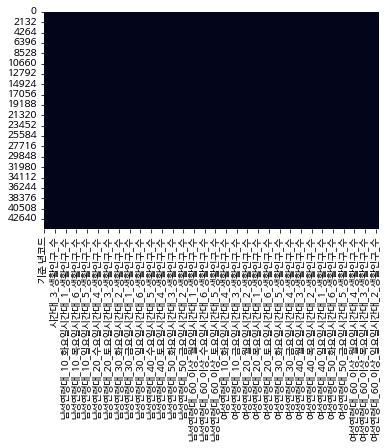

In [ ]:
sns.heatmap(liv_popul.isnull(), cbar=False)

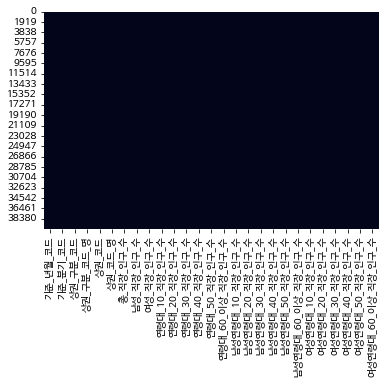

In [ ]:
sns.heatmap(work_popul.isnull(), cbar=False)

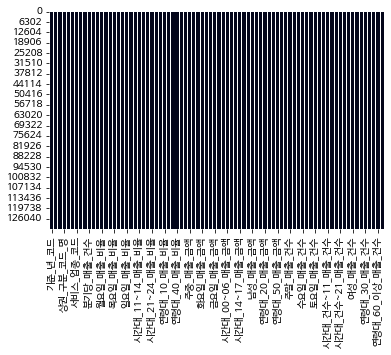

In [ ]:
sns.heatmap(sales.isnull(), cbar=False)

sales.isnull().sum()

# 인구수 비교



In [ ]:
total_liv_popul=liv_popul.iloc[:,:7]
total_liv_popul.head(5)

,기준 년코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_생활인구_수
0,2021,2,U,관광특구,1001496,강남 마이스 관광특구,95914
1,2021,2,U,관광특구,1001495,잠실 관광특구,2998695
2,2021,2,U,관광특구,1001494,종로?청계 관광특구,3889871
3,2021,2,U,관광특구,1001493,동대문패션타운 관광특구,3164130
4,2021,2,U,관광특구,1001492,명동 남대문 북창동 다동 무교동 관광특구,3714818


In [ ]:
total_liv_popul.columns = ["년도","분기","상권 구분 코드","상권 구분 코드명","상권 코드","상권 코드명","총 생활 인구수"]
total_liv_popul.head(5)

,년도,분기,상권 구분 코드,상권 구분 코드명,상권 코드,상권 코드명,총 생활 인구수
0,2021,2,U,관광특구,1001496,강남 마이스 관광특구,95914
1,2021,2,U,관광특구,1001495,잠실 관광특구,2998695
2,2021,2,U,관광특구,1001494,종로?청계 관광특구,3889871
3,2021,2,U,관광특구,1001493,동대문패션타운 관광특구,3164130
4,2021,2,U,관광특구,1001492,명동 남대문 북창동 다동 무교동 관광특구,3714818


In [ ]:
total_work_popul=work_popul.iloc[:,:7]
total_work_popul.head(5)

,기준_년월_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,총_직장_인구_수
0,2021,2,U,관광특구,1001496,강남 마이스 관광특구,15904
1,2021,2,U,관광특구,1001495,잠실 관광특구,24375
2,2021,2,U,관광특구,1001494,종로?청계 관광특구,32935
3,2021,2,U,관광특구,1001493,동대문패션타운 관광특구,6054
4,2021,2,U,관광특구,1001492,명동 남대문 북창동 다동 무교동 관광특구,104830


In [ ]:
total_work_popul.columns = ["년도","분기","상권 구분 코드","상권 구분 코드명","상권 코드","상권 코드명","총 직장 인구수"]
total_work_popul.head(5)

,년도,분기,상권 구분 코드,상권 구분 코드명,상권 코드,상권 코드명,총 직장 인구수
0,2021,2,U,관광특구,1001496,강남 마이스 관광특구,15904
1,2021,2,U,관광특구,1001495,잠실 관광특구,24375
2,2021,2,U,관광특구,1001494,종로?청계 관광특구,32935
3,2021,2,U,관광특구,1001493,동대문패션타운 관광특구,6054
4,2021,2,U,관광특구,1001492,명동 남대문 북창동 다동 무교동 관광특구,104830


In [ ]:
total_popul=pd.merge(total_liv_popul,total_work_popul)

In [ ]:
total_popul.head(5)

,년도,분기,상권 구분 코드,상권 구분 코드명,상권 코드,상권 코드명,총 생활 인구수,총 직장 인구수
0,2021,2,U,관광특구,1001496,강남 마이스 관광특구,95914,15904
1,2021,2,U,관광특구,1001495,잠실 관광특구,2998695,24375
2,2021,2,U,관광특구,1001494,종로?청계 관광특구,3889871,32935
3,2021,2,U,관광특구,1001493,동대문패션타운 관광특구,3164130,6054
4,2021,2,U,관광특구,1001492,명동 남대문 북창동 다동 무교동 관광특구,3714818,104830


In [ ]:
total_popul['총 인구수']=total_popul.iloc[:,[6,7]].sum(axis=1)
total_popul.head(5)

,년도,분기,상권 구분 코드,상권 구분 코드명,상권 코드,상권 코드명,총 생활 인구수,총 직장 인구수,총 인구수
0,2021,2,U,관광특구,1001496,강남 마이스 관광특구,95914,15904,111818
1,2021,2,U,관광특구,1001495,잠실 관광특구,2998695,24375,3023070
2,2021,2,U,관광특구,1001494,종로?청계 관광특구,3889871,32935,3922806
3,2021,2,U,관광특구,1001493,동대문패션타운 관광특구,3164130,6054,3170184
4,2021,2,U,관광특구,1001492,명동 남대문 북창동 다동 무교동 관광특구,3714818,104830,3819648


In [ ]:
total_popul_2020=total_popul[total_popul['년도']==2020]
total_popul_2020

,년도,분기,상권 구분 코드,상권 구분 코드명,상권 코드,상권 코드명,총 생활 인구수,총 직장 인구수,총 인구수
2948,2020,4,U,관광특구,1001496,강남 마이스 관광특구,90836,15904,106740
2949,2020,4,U,관광특구,1001495,잠실 관광특구,2956754,24375,2981129
2950,2020,4,U,관광특구,1001494,종로?청계 관광특구,3738997,32935,3771932
2951,2020,4,U,관광특구,1001493,동대문패션타운 관광특구,3058361,6054,3064415
2952,2020,4,U,관광특구,1001492,명동 남대문 북창동 다동 무교동 관광특구,3569497,104830,3674327
...,...,...,...,...,...,...,...,...,...
8839,2020,1,A,골목상권,1000005,백석동길,178717,1797,180514
8840,2020,1,A,골목상권,1000004,명륜길,623119,56,623175
8841,2020,1,A,골목상권,1000003,돈화문로11가길,178244,3686,181930
8842,2020,1,A,골목상권,1000002,난계로27길,347131,201,347332


In [ ]:
total_popul_2020_4=total_popul_2020[total_popul_2020['분기']==4]
total_popul_2020_4.tail(5)

,년도,분기,상권 구분 코드,상권 구분 코드명,상권 코드,상권 코드명,총 생활 인구수,총 직장 인구수,총 인구수
4417,2020,4,A,골목상권,1000005,백석동길,171919,1797,173716
4418,2020,4,A,골목상권,1000004,명륜길,675019,56,675075
4419,2020,4,A,골목상권,1000003,돈화문로11가길,167630,3686,171316
4420,2020,4,A,골목상권,1000002,난계로27길,354032,201,354233
4421,2020,4,A,골목상권,1000001,계동길,300188,842,301030


In [ ]:
tp204=total_popul_2020_4.sort_values(by=['총 인구수'],ascending=False)
tp204

,년도,분기,상권 구분 코드,상권 구분 코드명,상권 코드,상권 코드명,총 생활 인구수,총 직장 인구수,총 인구수
3983,2020,4,A,골목상권,1000439,북아현로4길,5034924,350,5035274
3243,2020,4,D,발달상권,1001182,홍익대학교 주변,4499293,8725,4508018
3343,2020,4,D,발달상권,1001082,선릉역_2,4020779,26260,4047039
2950,2020,4,U,관광특구,1001494,종로?청계 관광특구,3738997,32935,3771932
2952,2020,4,U,관광특구,1001492,명동 남대문 북창동 다동 무교동 관광특구,3569497,104830,3674327
...,...,...,...,...,...,...,...,...,...
3412,2020,4,D,발달상권,1001012,양재 화물트럭터미널앞_1,17788,1944,19732
3410,2020,4,D,발달상권,1001014,양재동 꽃시장,15721,1540,17261
3057,2020,4,R,전통시장,1001375,증산종합시장,16940,8,16948
4055,2020,4,A,골목상권,1000367,도봉산4길,16535,27,16562


# 상권 선택 (인구 4분기 기준 진행)

총 인구 상위 10개 상권

In [ ]:
tp204_10=tp204.iloc[:10]
tp204_10

,년도,분기,상권 구분 코드,상권 구분 코드명,상권 코드,상권 코드명,총 생활 인구수,총 직장 인구수,총 인구수
3983,2020,4,A,골목상권,1000439,북아현로4길,5034924,350,5035274
3243,2020,4,D,발달상권,1001182,홍익대학교 주변,4499293,8725,4508018
3343,2020,4,D,발달상권,1001082,선릉역_2,4020779,26260,4047039
2950,2020,4,U,관광특구,1001494,종로?청계 관광특구,3738997,32935,3771932
2952,2020,4,U,관광특구,1001492,명동 남대문 북창동 다동 무교동 관광특구,3569497,104830,3674327
3290,2020,4,D,발달상권,1001135,신사동 가로수길,3443163,14671,3457834
2951,2020,4,U,관광특구,1001493,동대문패션타운 관광특구,3058361,6054,3064415
3240,2020,4,D,발달상권,1001185,서울 서대문구 신촌역,2993929,924,2994853
2949,2020,4,U,관광특구,1001495,잠실 관광특구,2956754,24375,2981129
3284,2020,4,D,발달상권,1001141,압구정 로데오거리_2,2642900,7107,2650007


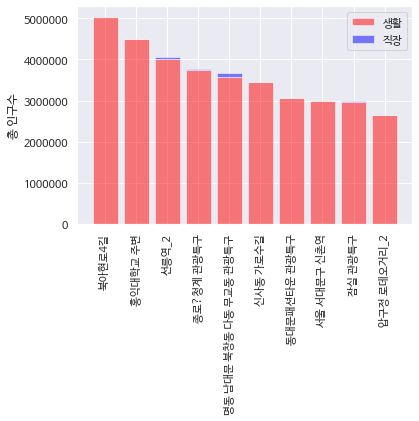

In [ ]:
sns.set(font="NanumBarunGothic")
tlp=tp204_10['총 생활 인구수']
twp=tp204_10['총 직장 인구수']
cdname=tp204_10['상권 코드명']
plt.ylabel('총 인구수')
p1=plt.bar(cdname,tlp,color='red',alpha=0.5)
p2=plt.bar(cdname,twp,color='blue',alpha=0.5,bottom=tlp)
plt.legend((p1[0],p2[0]),('생활','직장'))
sns.set(rc = {'figure.figsize':(4,3)})
plt.xticks(rotation = 90 )
ax=plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

총 인구수 대비 생활 인구 높은 상권 상위 10개 상권

In [ ]:
tp204['총 인구 대비 생활 인구']=tp204['총 생활 인구수']/ tp204['총 인구수']
tp204

,년도,분기,상권 구분 코드,상권 구분 코드명,상권 코드,상권 코드명,총 생활 인구수,총 직장 인구수,총 인구수,총 인구 대비 생활 인구
3983,2020,4,A,골목상권,1000439,북아현로4길,5034924,350,5035274,0.99993
3243,2020,4,D,발달상권,1001182,홍익대학교 주변,4499293,8725,4508018,0.99806
3343,2020,4,D,발달상권,1001082,선릉역_2,4020779,26260,4047039,0.99351
2950,2020,4,U,관광특구,1001494,종로?청계 관광특구,3738997,32935,3771932,0.99127
2952,2020,4,U,관광특구,1001492,명동 남대문 북창동 다동 무교동 관광특구,3569497,104830,3674327,0.97147
...,...,...,...,...,...,...,...,...,...,...
3412,2020,4,D,발달상권,1001012,양재 화물트럭터미널앞_1,17788,1944,19732,0.90148
3410,2020,4,D,발달상권,1001014,양재동 꽃시장,15721,1540,17261,0.91078
3057,2020,4,R,전통시장,1001375,증산종합시장,16940,8,16948,0.99953
4055,2020,4,A,골목상권,1000367,도봉산4길,16535,27,16562,0.99837


In [ ]:
tp204liv=tp204.sort_values(by=['총 인구 대비 생활 인구'],ascending=False)
tp204liv

,년도,분기,상권 구분 코드,상권 구분 코드명,상권 코드,상권 코드명,총 생활 인구수,총 직장 인구수,총 인구수,총 인구 대비 생활 인구
4102,2020,4,A,골목상권,1000320,도봉로13길,1039324,13,1039337,0.99999
4092,2020,4,A,골목상권,1000330,삼양로27길,406995,7,407002,0.99998
3581,2020,4,A,골목상권,1000843,소담길,801117,14,801131,0.99998
4093,2020,4,A,골목상권,1000329,삼양로24길,1447825,26,1447851,0.99998
3713,2020,4,A,골목상권,1000709,디지털로74길,658964,13,658977,0.99998
...,...,...,...,...,...,...,...,...,...,...
3211,2020,4,D,발달상권,1001214,종각역,56231,10396,66627,0.84397
3401,2020,4,D,발달상권,1001023,가산디지털단지역_2,130805,25194,155999,0.83850
4396,2020,4,A,골목상권,1000026,평창길,22704,6654,29358,0.77335
3283,2020,4,D,발달상권,1001142,국회의사당역_1,15567,4563,20130,0.77332


In [ ]:
tp204liv_10=tp204liv.iloc[:10]
tp204liv_10

,년도,분기,상권 구분 코드,상권 구분 코드명,상권 코드,상권 코드명,총 생활 인구수,총 직장 인구수,총 인구수,총 인구 대비 생활 인구
4102,2020,4,A,골목상권,1000320,도봉로13길,1039324,13,1039337,0.99999
4092,2020,4,A,골목상권,1000330,삼양로27길,406995,7,407002,0.99998
3581,2020,4,A,골목상권,1000843,소담길,801117,14,801131,0.99998
4093,2020,4,A,골목상권,1000329,삼양로24길,1447825,26,1447851,0.99998
3713,2020,4,A,골목상권,1000709,디지털로74길,658964,13,658977,0.99998
2976,2020,4,R,전통시장,1001467,우림시장,49844,1,49845,0.99998
4399,2020,4,A,골목상권,1000023,창신5길,689926,15,689941,0.99998
4397,2020,4,A,골목상권,1000025,통일로12길,557305,13,557318,0.99998
3001,2020,4,R,전통시장,1001438,우리시장,228151,6,228157,0.99997
4097,2020,4,A,골목상권,1000325,도봉로8길,215664,6,215670,0.99997


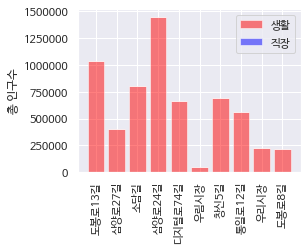

In [ ]:
sns.set(font="NanumBarunGothic")
tlp=tp204liv_10['총 생활 인구수']
twp=tp204liv_10['총 직장 인구수']
cdname=tp204liv_10['상권 코드명']
plt.ylabel('총 인구수')
p1=plt.bar(cdname,tlp,color='red',alpha=0.5)
p2=plt.bar(cdname,twp,color='blue',alpha=0.5,bottom=tlp)
plt.legend((p1[0],p2[0]),('생활','직장'))
sns.set(rc = {'figure.figsize':(4,3)})
plt.xticks(rotation = 90 )
ax=plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

총 인구수 대비 직장 인구 높은 상권 상위 10개 상권

In [ ]:
tp204work_10=tp204liv.sort_values(by=['총 인구 대비 생활 인구']).iloc[:10]
tp204work_10

,년도,분기,상권 구분 코드,상권 구분 코드명,상권 코드,상권 코드명,총 생활 인구수,총 직장 인구수,총 인구수,총 인구 대비 생활 인구
3321,2020,4,D,발달상권,1001104,삼성역_3,151750,52277,204027,0.74377
3283,2020,4,D,발달상권,1001142,국회의사당역_1,15567,4563,20130,0.77332
4396,2020,4,A,골목상권,1000026,평창길,22704,6654,29358,0.77335
3401,2020,4,D,발달상권,1001023,가산디지털단지역_2,130805,25194,155999,0.83850
3211,2020,4,D,발달상권,1001214,종각역,56231,10396,66627,0.84397
3403,2020,4,D,발달상권,1001021,가산디지털단지역_1,99444,18317,117761,0.84446
2948,2020,4,U,관광특구,1001496,강남 마이스 관광특구,90836,15904,106740,0.85100
3322,2020,4,D,발달상권,1001103,코엑스,90836,15904,106740,0.85100
3357,2020,4,D,발달상권,1001068,은마아파트입구사거리_2,100563,15650,116213,0.86533
3049,2020,4,R,전통시장,1001383,공덕시장,34409,3948,38357,0.89707


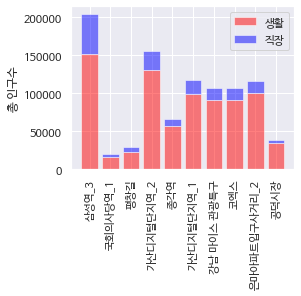

In [ ]:
sns.set(font="NanumBarunGothic")
tlp=tp204work_10['총 생활 인구수']
twp=tp204work_10['총 직장 인구수']
cdname=tp204work_10['상권 코드명']
plt.ylabel('총 인구수')
p1=plt.bar(cdname,tlp,color='red',alpha=0.5)
p2=plt.bar(cdname,twp,color='blue',alpha=0.5,bottom=tlp)
plt.legend((p1[0],p2[0]),('생활','직장'))
sns.set(rc = {'figure.figsize':(4,3)})
plt.xticks(rotation = 90 )
ax=plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

# 추정 매출

In [ ]:
sales=sales.iloc[:,:10]
sales

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수
0,2020,3,R,전통시장,1001370,역촌중앙시장,CS300009,청과상,33850673.00000,300
1,2020,3,R,전통시장,1001386,신수시장,CS200001,일반교습학원,35211411.00000,110
2,2020,1,A,골목상권,1000022,창신2길,CS200001,일반교습학원,22367209.00000,82
3,2020,3,R,전통시장,1001402,신월6동골목시장,CS100009,호프-간이주점,985883.00000,6
4,2020,1,A,골목상권,1000001,계동길,CS100001,한식음식점,431442455.00000,18548
...,...,...,...,...,...,...,...,...,...,...
132316,2020,2,R,전통시장,1001477,마천시장,CS100008,분식전문점,28919831.00000,2653
132317,2020,2,R,전통시장,1001487,천호시장,CS200028,미용실,59125109.00000,78
132318,2020,2,R,전통시장,1001488,성내골목시장,CS200030,피부관리실,6928058.00000,32
132319,2020,2,U,관광특구,1001496,강남 마이스 관광특구,CS200030,피부관리실,17953355.00000,95


In [ ]:
svc_code=sales[['서비스_업종_코드','서비스_업종_코드_명']]
svc_code=svc_code.drop_duplicates(['서비스_업종_코드'])
svc_code=svc_code.sort_values(by='서비스_업종_코드',ascending=True)
svc_code

,서비스_업종_코드,서비스_업종_코드_명
4,CS100001,한식음식점
8,CS100002,중식음식점
9,CS100003,일식음식점
150,CS100004,양식음식점
151,CS100005,제과점
...,...,...
84,CS300032,가전제품
244,CS300033,철물점
67,CS300035,인테리어
55,CS300036,조명용품


In [ ]:
sales['서비스_대분류']=""
sales.loc[sales['서비스_업종_코드'].str.contains('CS1'),'서비스_대분류'] = '외식'
sales.loc[sales['서비스_업종_코드'].str.contains('CS2'),'서비스_대분류'] = '서비스'
sales.loc[sales['서비스_업종_코드'].str.contains('CS3'),'서비스_대분류'] = '소매'
sales

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,서비스_대분류
0,2020,3,R,전통시장,1001370,역촌중앙시장,CS300009,청과상,33850673.00000,300,소매
1,2020,3,R,전통시장,1001386,신수시장,CS200001,일반교습학원,35211411.00000,110,서비스
2,2020,1,A,골목상권,1000022,창신2길,CS200001,일반교습학원,22367209.00000,82,서비스
3,2020,3,R,전통시장,1001402,신월6동골목시장,CS100009,호프-간이주점,985883.00000,6,외식
4,2020,1,A,골목상권,1000001,계동길,CS100001,한식음식점,431442455.00000,18548,외식
...,...,...,...,...,...,...,...,...,...,...,...
132316,2020,2,R,전통시장,1001477,마천시장,CS100008,분식전문점,28919831.00000,2653,외식
132317,2020,2,R,전통시장,1001487,천호시장,CS200028,미용실,59125109.00000,78,서비스
132318,2020,2,R,전통시장,1001488,성내골목시장,CS200030,피부관리실,6928058.00000,32,서비스
132319,2020,2,U,관광특구,1001496,강남 마이스 관광특구,CS200030,피부관리실,17953355.00000,95,서비스


In [ ]:
sales2=sales[['상권_코드_명','서비스_업종_코드_명','서비스_대분류','분기당_매출_금액','분기당_매출_건수']]
sales3=sales2.groupby(['상권_코드_명','서비스_업종_코드_명','서비스_대분류'],as_index=False).sum()
sales_total=sales3
sales_total.rename(columns={'분기당_매출_금액':'연 매출','분기당_매출_건수':'연 매출 건수'},inplace=True)
sales_total

,상권_코드_명,서비스_업종_코드_명,서비스_대분류,연 매출,연 매출 건수
0,가락시장,미곡판매,소매,61600659819.00000,1136244
1,가락시장,반찬가게,소매,689764000000.00000,13896203
2,가락시장,분식전문점,외식,848195913.00000,35662
3,가락시장,슈퍼마켓,소매,14071511086.00000,312364
4,가락시장,양식음식점,외식,290368794.00000,11062
...,...,...,...,...,...
34643,흑석시장,편의점,소매,1197624102.00000,203387
34644,흑석시장,피부관리실,서비스,974043495.00000,2622
34645,흑석시장,한식음식점,외식,11102440028.00000,291816
34646,흑석시장,한의원,서비스,829714880.00000,42567


# 상권 비교 (인구 상위 10)

인구 상위 10개 상권의 상위 10개 업종

In [ ]:
pop10=list(np.array(tp204_10['상권 코드명'].tolist()))
pop10

['북아현로4길',
 '홍익대학교 주변',
 '선릉역_2',
 '종로?청계 관광특구',
 '명동 남대문 북창동 다동 무교동 관광특구',
 '신사동 가로수길',
 '동대문패션타운 관광특구',
 '서울 서대문구 신촌역',
 '잠실 관광특구',
 '압구정 로데오거리_2']

In [ ]:
pop10sales = sales_total.loc[sales_total['상권_코드_명'].isin(pop10)]
pop10sales

,상권_코드_명,서비스_업종_코드_명,서비스_대분류,연 매출,연 매출 건수
8811,동대문패션타운 관광특구,PC방,서비스,1829467616.00000,436042
8812,동대문패션타운 관광특구,가구,소매,17048339523.00000,33493
8813,동대문패션타운 관광특구,가방,소매,2825934242.00000,42023
8814,동대문패션타운 관광특구,가전제품,소매,184971215.00000,1509
8815,동대문패션타운 관광특구,골프연습장,서비스,580407281.00000,16238
...,...,...,...,...,...
33853,홍익대학교 주변,한의원,서비스,1547061020.00000,22768
33854,홍익대학교 주변,핸드폰,소매,573585604.00000,10628
33855,홍익대학교 주변,호프-간이주점,외식,61963077162.00000,1865817
33856,홍익대학교 주변,화장품,소매,44805232892.00000,1449420


In [ ]:
pop10sales=pop10sales.sort_values(by='연 매출',ascending=False)
pop10sales.head(20)

,상권_코드_명,서비스_업종_코드_명,서비스_대분류,연 매출,연 매출 건수
8837,동대문패션타운 관광특구,일반의류,소매,370026491820.00000,5100962
22469,신사동 가로수길,일반의원,서비스,256477742399.00000,670938
11467,명동 남대문 북창동 다동 무교동 관광특구,일반의류,소매,220061355647.00000,3336382
28618,잠실 관광특구,일반의류,소매,217322150675.00000,1279183
23440,압구정 로데오거리_2,일반의류,소매,198111187898.00000,1021937
11483,명동 남대문 북창동 다동 무교동 관광특구,한식음식점,외식,186780842736.00000,5278035
20291,선릉역_2,의약품,소매,155391238683.00000,2377347
8841,동대문패션타운 관광특구,전자상거래업,소매,148285846600.00000,10391340
11487,명동 남대문 북창동 다동 무교동 관광특구,화장품,소매,146455512919.00000,2575415
33838,홍익대학교 주변,일반의류,소매,137458489193.00000,3571327


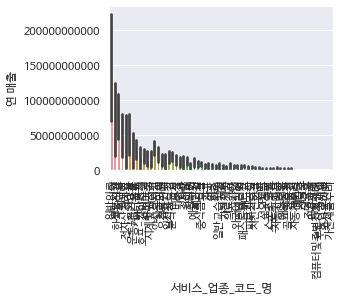

In [ ]:
sns.set(font="NanumBarunGothic")
sns.barplot(data = pop10sales, x = "서비스_업종_코드_명", y = "연 매출" )
sns.set(rc = {'figure.figsize':(15,3)})
plt.xticks(rotation = 90 )
ax=plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [ ]:
sortpop=pop10sales.groupby(['서비스_대분류','서비스_업종_코드_명'],as_index=False).sum()
sortpop=sortpop.sort_values(by='연 매출',ascending=False)
sortpop=sortpop.head(10)
sortpop

,서비스_대분류,서비스_업종_코드_명,연 매출,연 매출 건수
42,소매,일반의류,1285525225793.00000,16173464
60,외식,한식음식점,663672354225.00000,19516150
16,서비스,일반의원,494655049338.00000,2689581
50,소매,화장품,364407297073.00000,7538030
40,소매,의약품,349964839465.00000,11083822
58,외식,커피-음료,248135861652.00000,30266634
48,소매,편의점,243480381119.00000,42874190
43,소매,전자상거래업,174218457108.00000,10799434
61,외식,호프-간이주점,166699586487.00000,4931486
53,외식,양식음식점,162044659577.00000,4208545


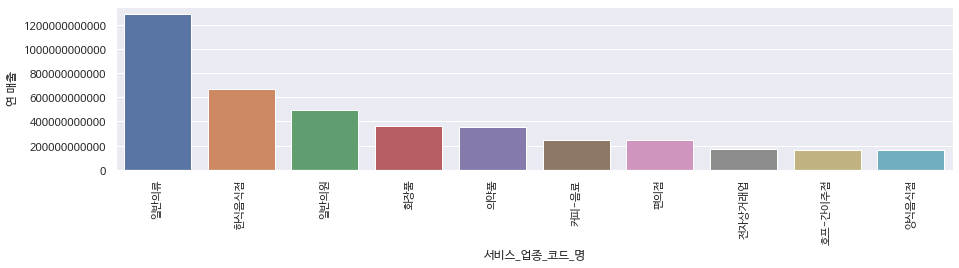

In [ ]:
sns.set(font="NanumBarunGothic")
sns.barplot(data = sortpop, x = "서비스_업종_코드_명", y = "연 매출" )
sns.set(rc = {'figure.figsize':(3,3)})
plt.xticks(rotation = 90 )
ax=plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

# 상권 비교 (생활 인구 상위 10)

In [ ]:
liv10 = list(np.array(tp204liv_10['상권 코드명'].tolist()))
liv10

['도봉로13길',
 '삼양로27길',
 '소담길',
 '삼양로24길',
 '디지털로74길',
 '우림시장',
 '창신5길',
 '통일로12길',
 '우리시장',
 '도봉로8길']

In [ ]:
liv10sales = sales_total.loc[sales_total['상권_코드_명'].isin(liv10)]
liv10sales = liv10sales.sort_values(by='연 매출',ascending=False)
liv10sales

,상권_코드_명,서비스_업종_코드_명,서비스_대분류,연 매출,연 매출 건수
15195,삼양로27길,슈퍼마켓,소매,5583985724.00000,315861
15212,삼양로27길,한식음식점,외식,3971194711.00000,164374
20990,소담길,슈퍼마켓,소매,3776737168.00000,378748
26779,우리시장,슈퍼마켓,소매,3586172020.00000,362229
10352,디지털로74길,제과점,외식,2641063074.00000,76400
...,...,...,...,...,...
7400,도봉로13길,슈퍼마켓,소매,3468570.00000,160
26772,우리시장,노래방,서비스,2949605.00000,73
7402,도봉로13길,신발,소매,2168313.00000,25
32155,통일로12길,치킨전문점,외식,1995901.00000,259


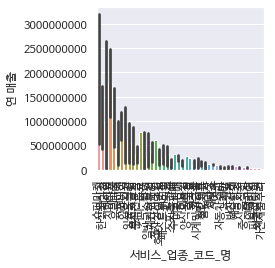

In [ ]:
sns.set(font="NanumBarunGothic")
sns.barplot(data = liv10sales, x = "서비스_업종_코드_명", y = "연 매출" )
sns.set(rc = {'figure.figsize':(15,3)})
plt.xticks(rotation = 90 )
ax=plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [ ]:
sortliv=liv10sales.groupby(['서비스_대분류','서비스_업종_코드_명'],as_index=False).sum()
sortliv=sortliv.sort_values(by='연 매출',ascending=False)
sortliv=sortliv.head(10)
sortliv

,서비스_대분류,서비스_업종_코드_명,연 매출,연 매출 건수
20,소매,슈퍼마켓,15871882998.00000,1296165
42,외식,한식음식점,9756907594.00000,323963
31,소매,편의점,6136933855.00000,880962
25,소매,의약품,4282392444.00000,330769
13,서비스,치과의원,3567345447.00000,23875
37,외식,제과점,2956450406.00000,117638
34,외식,분식전문점,2412454012.00000,249041
24,소매,육류판매,2169730074.00000,88414
39,외식,치킨전문점,2118297925.00000,113860
11,서비스,일반의원,1854273999.00000,93348


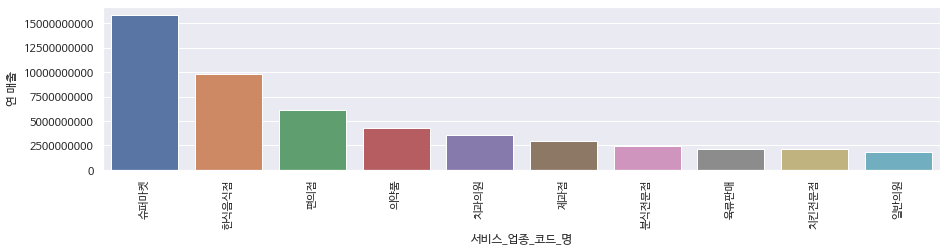

In [ ]:
sns.set(font="NanumBarunGothic")
sns.barplot(data = sortliv, x = "서비스_업종_코드_명", y = "연 매출" )
sns.set(rc = {'figure.figsize':(3,3)})
plt.xticks(rotation = 90 )
ax=plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

생활 인구 상위 10위 상권에서는 슈퍼마켓 - 한식 음식점 - 편의점 - 의약품 - 치과의원 - 제과점 등 순으로 매출이 높은 것을 알 수 있음

# 상권 비교 (직장 인구 상위 10)

In [ ]:
work10 = list(np.array(tp204work_10['상권 코드명'].tolist()))
work10

['삼성역_3',
 '국회의사당역_1',
 '평창길',
 '가산디지털단지역_2',
 '종각역',
 '가산디지털단지역_1',
 '강남 마이스 관광특구',
 '코엑스',
 '은마아파트입구사거리_2',
 '공덕시장']

In [ ]:
work10sales = sales_total.loc[sales_total['상권_코드_명'].isin(work10)]
work10sales = work10sales.sort_values(by='연 매출',ascending=False)
work10sales

,상권_코드_명,서비스_업종_코드_명,서비스_대분류,연 매출,연 매출 건수
32037,코엑스,일반의류,소매,244291907056.00000,3629844
457,강남 마이스 관광특구,일반의류,소매,244291907056.00000,3629844
165,가산디지털단지역_2,의료기기,소매,115150602279.00000,90205
32051,코엑스,화장품,소매,100132264486.00000,830891
471,강남 마이스 관광특구,화장품,소매,100132264486.00000,830891
...,...,...,...,...,...
2551,공덕시장,일반의류,소매,11951372.00000,417
181,가산디지털단지역_2,피부관리실,서비스,5393271.00000,30
3999,국회의사당역_1,컴퓨터및주변장치판매,소매,1496441.00000,54
154,가산디지털단지역_2,미용실,서비스,1343034.00000,36


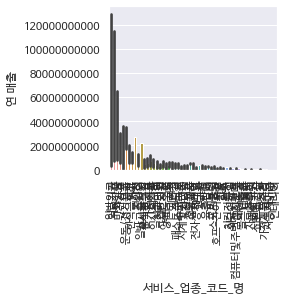

In [ ]:
sns.set(font="NanumBarunGothic")
sns.barplot(data = work10sales, x = "서비스_업종_코드_명", y = "연 매출" )
sns.set(rc = {'figure.figsize':(15,3)})
plt.xticks(rotation = 90 )
ax=plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [ ]:
sortwork=work10sales.groupby(['서비스_대분류','서비스_업종_코드_명'],as_index=False).sum()
sortwork=sortwork.sort_values(by='연 매출',ascending=False)
sortwork=sortwork.head(10)
sortwork

,서비스_대분류,서비스_업종_코드_명,연 매출,연 매출 건수
36,소매,일반의류,520091556490.00000,7654387
43,소매,화장품,255069262126.00000,2120862
33,소매,의료기기,122143865463.00000,99345
31,소매,운동/경기용품,105590624692.00000,347687
53,외식,한식음식점,95220124490.00000,5037234
22,소매,반찬가게,92223045455.00000,2178509
21,소매,문구,82782119094.00000,2753034
18,소매,가구,72865093000.00000,42795
41,소매,편의점,66941727588.00000,13407764
19,소매,가방,53159200426.00000,1717744


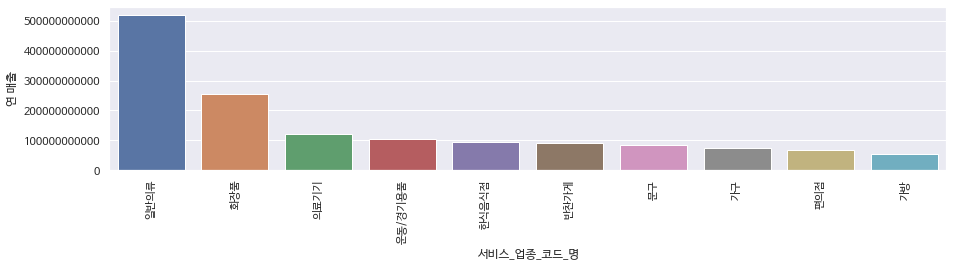

In [ ]:
sns.set(font="NanumBarunGothic")
sns.barplot(data = sortwork, x = "서비스_업종_코드_명", y = "연 매출" )
sns.set(rc = {'figure.figsize':(3,3)})
plt.xticks(rotation = 90 )
ax=plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

직장 인구 상위 10위 상권에서는 일반 의류 - 화장품 - 의료기기 - 운동/경기 용품 - 한식 음식점 등의 순서대로 매출이 많은 것을 확인.

# 상권별 편의점/슈퍼마켓 비교

In [ ]:
livcmp=liv10sales.groupby(['서비스_대분류','서비스_업종_코드_명'],as_index=False).sum()
livcmp=livcmp.sort_values(by='연 매출',ascending=False)
livcmp1=sortliv.loc[(sortliv['서비스_업종_코드_명']=='편의점')|(sortliv['서비스_업종_코드_명']=='슈퍼마켓')]
livcmp1=livcmp1.drop(['서비스_대분류'],axis=1)
livcmp1['연 매출 비율']=livcmp1['연 매출']/livcmp1['연 매출'].sum()*100
livcmp1['연 매출 건수 비율']=livcmp1['연 매출 건수']/livcmp1['연 매출 건수'].sum()*100
livcmp1

,서비스_업종_코드_명,연 매출,연 매출 건수,연 매출 비율,연 매출 건수 비율
20,슈퍼마켓,15871882998.00000,1296165,72.11602,59.53557
31,편의점,6136933855.00000,880962,27.88398,40.46443


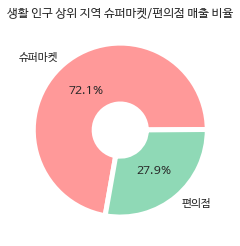

In [ ]:
#매출 비율
sns.set(font="NanumBarunGothic")
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ['#ff9999', '#8fd9b6']
plt.pie(livcmp1['연 매출 비율'],labels=livcmp1['서비스_업종_코드_명'],autopct='%.1f%%', 
        startangle=260, counterclock=False, wedgeprops=wedgeprops, colors=colors)
plt.title('생활 인구 상위 지역 슈퍼마켓/편의점 매출 비율')
plt.rcParams['figure.figsize'] = (4,4)
plt.show()

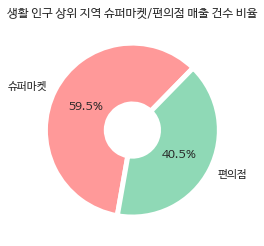

In [ ]:
#매출 건수 비율
sns.set(font="NanumBarunGothic")
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ['#ff9999', '#8fd9b6']
plt.pie(livcmp1['연 매출 건수 비율'],labels=livcmp1['서비스_업종_코드_명'],autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops, colors=colors)
plt.title('생활 인구 상위 지역 슈퍼마켓/편의점 매출 건수 비율')
plt.rcParams['figure.figsize'] = (4,4)
plt.show()

생활 인구가 많은 상권에서는 슈퍼마켓의 매출량이 편의점의 매출량에 비해 3배 가량 높음. 반면 매출 건수는 편의점이 약 40% 차지, 슈퍼 마켓에서 구매 할 때에 비해 비교적 저렴한 물건 혹은 적은 수의 물건을 사는 것으로 해석 가능.

In [ ]:
workcmp=work10sales.groupby(['서비스_대분류','서비스_업종_코드_명'],as_index=False).sum()
workcmp=workcmp.sort_values(by='연 매출',ascending=False)
workcmp1=workcmp.loc[(workcmp['서비스_업종_코드_명']=='편의점')|(workcmp['서비스_업종_코드_명']=='슈퍼마켓')]
workcmp1=workcmp1.drop(['서비스_대분류'],axis=1)
workcmp1['연 매출 비율']=workcmp1['연 매출']/workcmp1['연 매출'].sum()*100
workcmp1['연 매출 건수 비율']=workcmp1['연 매출 건수']/workcmp1['연 매출 건수'].sum()*100
workcmp1=workcmp1.sort_values(by='서비스_업종_코드_명')
workcmp1

,서비스_업종_코드_명,연 매출,연 매출 건수,연 매출 비율,연 매출 건수 비율
25,슈퍼마켓,12005634637.00000,904566,15.20714,6.32019
41,편의점,66941727588.00000,13407764,84.79286,93.67981


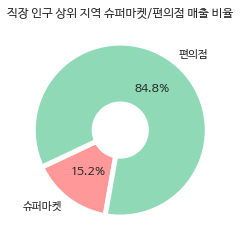

In [ ]:
#매출 비율
sns.set(font="NanumBarunGothic")
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ['#ff9999', '#8fd9b6']
plt.pie(workcmp1['연 매출 비율'],labels=workcmp1['서비스_업종_코드_명'],autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops, colors=colors)
plt.title('직장 인구 상위 지역 슈퍼마켓/편의점 매출 비율')
plt.rcParams['figure.figsize'] = (4,4)
plt.show()

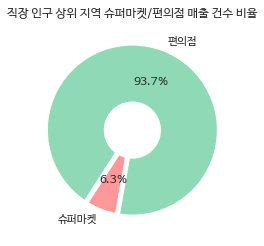

In [ ]:
#매출 건수 비율
sns.set(font="NanumBarunGothic")
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ['#ff9999', '#8fd9b6']
plt.pie(workcmp1['연 매출 건수 비율'],labels=workcmp1['서비스_업종_코드_명'],autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops, colors=colors)
plt.title('직장 인구 상위 지역 슈퍼마켓/편의점 매출 건수 비율')
plt.rcParams['figure.figsize'] = (4,4)
plt.show()

반면 직장 인구 상위 상권에서는 편의점의 매출과 건수가 슈퍼마켓에 비해 월등히 높음. 생활 인구 상위 상권에서는 사람들이 생필품이 더 다양한 슈퍼마켓을 이용하지만 직장 인구 상위 상권에서는 담배나 커피/음료같은 제품들을 더 선호하기 때문으로 사료됨.

# 상권 별 음식점 비교

In [ ]:
stores=pd.read_csv('/content/drive/MyDrive/서울시_우리마을가게_상권분석서비스(상권-점포)_2020년.csv', encoding='euc-kr')
stores

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수,유사_업종_점포_수,개업_율,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수
0,2020,1,A,골목상권,1000001,계동길,CS300018,의약품,0,0,0,0,0,0,0
1,2020,1,D,발달상권,1001250,서울 은평구 불광역_3,CS300014,신발,0,0,0,0,0,0,0
2,2020,1,A,골목상권,1000001,계동길,CS300032,가전제품,1,1,0,0,0,0,0
3,2020,1,R,전통시장,1001392,동진시장,CS200034,여관,0,0,0,0,0,0,0
4,2020,1,U,관광특구,1001495,잠실 관광특구,CS200022,복권방,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373506,2020,4,A,골목상권,1000982,상일로5길,CS300006,미곡판매,0,0,0,0,0,0,0
373507,2020,4,A,골목상권,1000982,상일로5길,CS100005,제과점,2,2,0,0,0,0,0
373508,2020,4,A,골목상권,1000982,상일로5길,CS200029,네일숍,1,1,0,0,0,0,0
373509,2020,4,A,골목상권,1000982,상일로5길,CS200009,동물병원,1,1,0,0,0,0,0


In [ ]:
stores_liv= stores.loc[stores['상권_코드_명'].isin(liv10)]
res_liv=stores_liv.loc[stores_liv['서비스_업종_코드_명'].str.contains('음식점')]
res_liv=res_liv.iloc[:,:9]
res_liv


,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수
1379,2020,1,A,골목상권,1000023,창신5길,CS100001,한식음식점,5
1380,2020,1,A,골목상권,1000023,창신5길,CS100002,중식음식점,2
1381,2020,1,A,골목상권,1000023,창신5길,CS100003,일식음식점,0
1382,2020,1,A,골목상권,1000023,창신5길,CS100004,양식음식점,1
1461,2020,1,A,골목상권,1000025,통일로12길,CS100001,한식음식점,2
...,...,...,...,...,...,...,...,...,...
357906,2020,4,A,골목상권,1000325,도봉로8길,CS100002,중식음식점,1
366318,2020,4,A,골목상권,1000025,통일로12길,CS100002,중식음식점,2
366321,2020,4,A,골목상권,1000025,통일로12길,CS100001,한식음식점,3
368044,2020,4,A,골목상권,1000023,창신5길,CS100004,양식음식점,1


In [ ]:
res_liv2=res_liv[['상권_코드_명','서비스_업종_코드_명','점포_수']]
res_liv3=res_liv2.groupby(['상권_코드_명','서비스_업종_코드_명'],as_index=False).mean()
res_liv=res_liv3
res_liv['점포_수']=round(res_liv['점포_수'])
res_liv

,상권_코드_명,서비스_업종_코드_명,점포_수
0,도봉로13길,양식음식점,0.00000
1,도봉로13길,일식음식점,0.00000
2,도봉로13길,중식음식점,0.00000
3,도봉로13길,한식음식점,10.00000
4,도봉로8길,일식음식점,0.00000
5,도봉로8길,중식음식점,2.00000
6,도봉로8길,한식음식점,9.00000
7,디지털로74길,양식음식점,0.00000
8,디지털로74길,일식음식점,0.00000
9,디지털로74길,중식음식점,0.00000


In [ ]:
res_liv1=res_liv.groupby('서비스_업종_코드_명',as_index=False).sum()

In [ ]:
stores_work= stores.loc[stores['상권_코드_명'].isin(work10)]
res_work=stores_work.loc[stores_work['서비스_업종_코드_명'].str.contains('음식점')]
res_work=res_work.iloc[:,:9]
res_work

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,점포_수
1510,2020,1,A,골목상권,1000026,평창길,CS100001,한식음식점,9
1511,2020,1,A,골목상권,1000026,평창길,CS100002,중식음식점,2
1512,2020,1,A,골목상권,1000026,평창길,CS100003,일식음식점,0
1513,2020,1,A,골목상권,1000026,평창길,CS100004,양식음식점,2
63319,2020,1,D,발달상권,1001021,가산디지털단지역_1,CS100001,한식음식점,33
...,...,...,...,...,...,...,...,...,...
355016,2020,4,A,골목상권,1000026,평창길,CS100001,한식음식점,8
359418,2020,4,D,발달상권,1001103,코엑스,CS100001,한식음식점,38
359454,2020,4,U,관광특구,1001496,강남 마이스 관광특구,CS100002,중식음식점,7
363174,2020,4,D,발달상권,1001023,가산디지털단지역_2,CS100002,중식음식점,12


In [ ]:
res_work2=res_work[['상권_코드_명','서비스_업종_코드_명','점포_수']]
res_work3=res_work2.groupby(['상권_코드_명','서비스_업종_코드_명'],as_index=False).mean()
res_work=res_work3
res_work['점포_수']=round(res_work['점포_수'])
res_work

,상권_코드_명,서비스_업종_코드_명,점포_수
0,가산디지털단지역_1,양식음식점,2.00000
1,가산디지털단지역_1,일식음식점,2.00000
2,가산디지털단지역_1,중식음식점,6.00000
3,가산디지털단지역_1,한식음식점,32.00000
4,가산디지털단지역_2,양식음식점,7.00000
5,가산디지털단지역_2,일식음식점,10.00000
6,가산디지털단지역_2,중식음식점,12.00000
7,가산디지털단지역_2,한식음식점,94.00000
8,강남 마이스 관광특구,양식음식점,36.00000
9,강남 마이스 관광특구,일식음식점,16.00000


In [ ]:
res_work1=res_work.groupby('서비스_업종_코드_명',as_index=False).sum()


In [ ]:
livcmp2=livcmp.loc[livcmp['서비스_업종_코드_명'].str.contains('음식점')]
livcmp2=livcmp2.drop(['서비스_대분류'],axis=1)
livcmp2['연 매출 비율']=livcmp2['연 매출']/livcmp2['연 매출'].sum()*100
livcmp2['연 매출 건수 비율']=livcmp2['연 매출 건수']/livcmp2['연 매출 건수'].sum()*100
livcmp2=pd.merge(livcmp2, res_liv1, on='서비스_업종_코드_명',how='outer')
livcmp2['점포 비율']=livcmp2['점포_수']/livcmp2['점포_수'].sum()*100
livcmp2

,서비스_업종_코드_명,연 매출,연 매출 건수,연 매출 비율,연 매출 건수 비율,점포_수,점포 비율
0,한식음식점,9756907594.00000,323963,87.27247,85.74851,62.00000,80.51948
1,일식음식점,1092821933.00000,33416,9.77495,8.84475,4.00000,5.19481
2,양식음식점,274882916.00000,17356,2.45874,4.59389,3.00000,3.89610
3,중식음식점,55210482.00000,3071,0.49384,0.81285,8.00000,10.38961


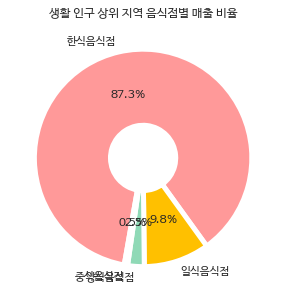

In [ ]:
#매출 비율
sns.set(font="NanumBarunGothic")
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
plt.pie(livcmp2['연 매출 비율'],labels=livcmp2['서비스_업종_코드_명'],autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops, colors=colors)
plt.title('생활 인구 상위 지역 음식점별 매출 비율')
plt.rcParams['figure.figsize'] = (5,5)
plt.show()

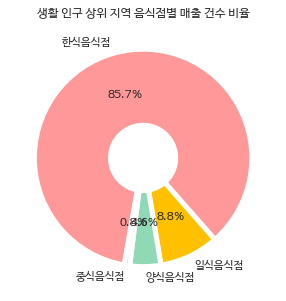

In [ ]:
#매출 건수 비율
sns.set(font="NanumBarunGothic")
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
plt.pie(livcmp2['연 매출 건수 비율'],labels=livcmp2['서비스_업종_코드_명'],autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops, colors=colors)
plt.title('생활 인구 상위 지역 음식점별 매출 건수 비율')
plt.rcParams['figure.figsize'] = (5,5)
plt.show()

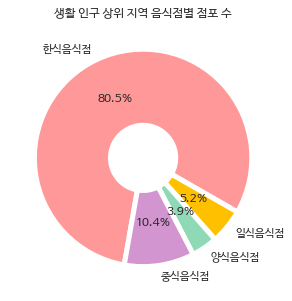

In [ ]:
#점포 수 비율
sns.set(font="NanumBarunGothic")
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
plt.pie(livcmp2['점포 비율'],labels=livcmp2['서비스_업종_코드_명'],autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops, colors=colors)
plt.title('생활 인구 상위 지역 음식점별 점포 수')
plt.rcParams['figure.figsize'] = (5,5)
plt.show()

생활 인구 상위 지역은 음식점의 대부분이 한식. 시장이 많고 외부인들이 잘 찾지 않기 때문에 한식 위주의 외식.

In [ ]:
workcmp2=workcmp.loc[workcmp['서비스_업종_코드_명'].str.contains('음식점')]
workcmp2=workcmp2.drop(['서비스_대분류'],axis=1)
workcmp2['연 매출 비율']=workcmp2['연 매출']/workcmp2['연 매출'].sum()*100
workcmp2['연 매출 건수 비율']=workcmp2['연 매출 건수']/workcmp2['연 매출 건수'].sum()*100
workcmp2=pd.merge(workcmp2, res_work1, on='서비스_업종_코드_명',how='outer')
workcmp2['점포 비율']=workcmp2['점포_수']/workcmp2['점포_수'].sum()*100
workcmp2

,서비스_업종_코드_명,연 매출,연 매출 건수,연 매출 비율,연 매출 건수 비율,점포_수,점포 비율
0,한식음식점,95220124490.00000,5037234,49.34539,60.35043,335.00000,62.03704
1,중식음식점,39591970613.00000,1207328,20.51752,14.46484,43.00000,7.96296
2,일식음식점,34103975045.00000,1325876,17.67351,15.88514,66.00000,12.22222
3,양식음식점,24050554552.00000,776204,12.46358,9.29960,96.00000,17.77778


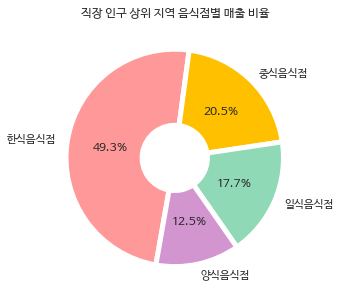

In [ ]:
#매출 비율
sns.set(font="NanumBarunGothic")
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
plt.pie(workcmp2['연 매출 비율'],labels=workcmp2['서비스_업종_코드_명'],autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops, colors=colors)
plt.title('직장 인구 상위 지역 음식점별 매출 비율')
plt.rcParams['figure.figsize'] = (5,5)
plt.show()

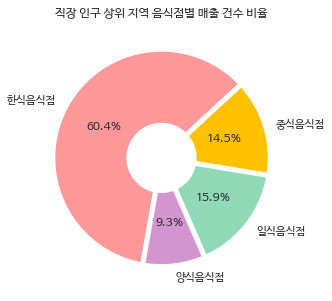

In [ ]:
#매출 건수 비율
sns.set(font="NanumBarunGothic")
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
plt.pie(workcmp2['연 매출 건수 비율'],labels=workcmp2['서비스_업종_코드_명'],autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops, colors=colors)
plt.title('직장 인구 상위 지역 음식점별 매출 건수 비율')
plt.rcParams['figure.figsize'] = (5,5)
plt.show()

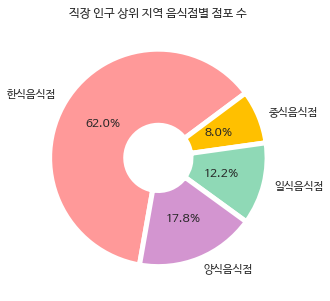

In [ ]:
#점포 수 비율
sns.set(font="NanumBarunGothic")
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
plt.pie(workcmp2['점포_수'],labels=workcmp2['서비스_업종_코드_명'],autopct='%.1f%%', startangle=260, counterclock=False, wedgeprops=wedgeprops, colors=colors)
plt.title('직장 인구 상위 지역 음식점별 점포 수')
plt.rcParams['figure.figsize'] = (5,5)
plt.show()

직장인들의 식사 수요가 다양하기 때문. 생활 인구 상위 상권에 비해 다양한 사람들의 왕래가 잦음.